# Regression Analysis

Regression analysis is a statistical method used to examine the relationship between one dependent variable and one or more independent variables. The goal is to model the expected value of the dependent variable in terms of the independent variables.

## Types of Regression

1. **Linear Regression**: Models the relationship between two variables by fitting a linear equation to observed data.
2. **Multiple Linear Regression**: Extends linear regression by using multiple independent variables to predict the dependent variable.
3. **Polynomial Regression**: Fits a polynomial equation to the data.
4. **Logistic Regression**: Used for binary classification problems, where the outcome is a binary variable.
5. **Ridge Regression**: A type of linear regression that includes a regularization term to prevent overfitting.
6. **Lasso Regression**: Similar to ridge regression but can shrink some coefficients to zero, effectively performing variable selection.

## Data Types for Regression

Regression can be applied to various types of data, including:

- **Continuous Data**: Such as height, weight, temperature, etc.
- **Categorical Data**: Can be used in logistic regression for classification tasks.
- **Time Series Data**: For predicting future values based on past observations.

## Matplotlib for Regression

Matplotlib is a powerful library for creating static, animated, and interactive visualizations in Python. It can be used to visualize regression models.

### Example: Linear Regression with Matplotlib

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 3, 2, 5, 4])

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()
```

### Example: Polynomial Regression with Matplotlib

```python
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 3, 2, 5, 4])

# Transform the data to include polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Plot the data and the polynomial regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Polynomial regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()
```

These examples demonstrate how to perform and visualize linear and polynomial regression using Matplotlib and Scikit-learn in Python.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [84]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
x=df['age']
y=df['fare']
x.isnull().sum()/len(x)*100

np.float64(19.865319865319865)

In [86]:
y.isnull().sum()/len(y)*100

np.float64(0.0)

In [87]:
x.fillna(x.mean(),inplace=True)

In [88]:
x.isnull().sum()/len(x)*100

np.float64(0.0)

In [89]:
x

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [90]:
df1=df[x,y]

InvalidIndexError: (0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64, 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64)

In [10]:
x.shape

(891,)

In [11]:
y.shape

(891,)

In [14]:
df1 = df[['fare', 'age']]
df1.head()

,fare,age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fare    891 non-null    float64
 1   age     891 non-null    float64
dtypes: float64(2)
memory usage: 14.1 KB


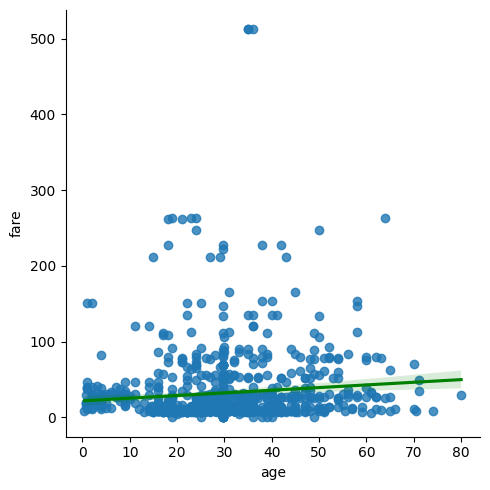

In [ ]:
# draw lmplot of fare and age and color of line is green
sns.lmplot(x='age', y='fare', data=df1, line_kws={'color': 'green'})


In [18]:
#remove outliers from fare using IQR
Q1 = df1['fare'].quantile(0.25)
Q3 = df1['fare'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['fare'] >= Q1 - 1.5*IQR) & (df1['fare'] <= Q3 + 1.5*IQR)]
df1.shape

(775, 2)

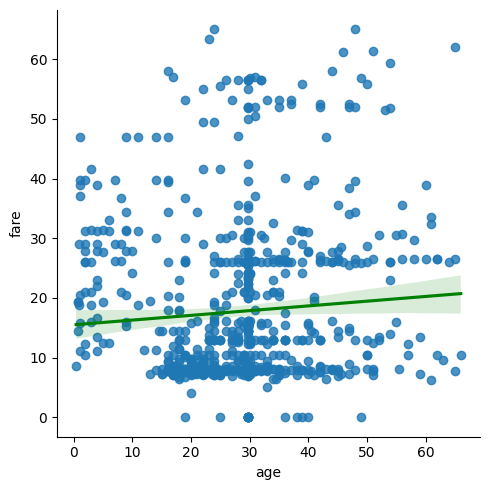

In [ ]:
sns.lmplot(x='age', y='fare', data=df1, line_kws={'color': 'green'})

In [20]:
df1.describe()

,fare,age
count,775.000000,775.000000
mean,17.822091,29.103880
std,13.578085,12.779988
min,0.000000,0.420000
25%,7.895800,22.000000
50%,13.000000,29.699118
75%,26.000000,34.000000
max,65.000000,80.000000


In [49]:
#remove outliers from age using IQR
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1['age'] >= Q1 - 1.5*IQR) & (df1['age'] <= Q3 + 1.5*IQR)]
df1.shape


(708, 2)

In [52]:
df1.describe()

,fare,age
count,708.000000,708.000000
mean,17.135092,28.441041
std,13.414455,9.530861
min,0.000000,4.000000
25%,7.879200,22.000000
50%,11.241700,29.699118
75%,25.496900,32.000000
max,65.000000,52.000000


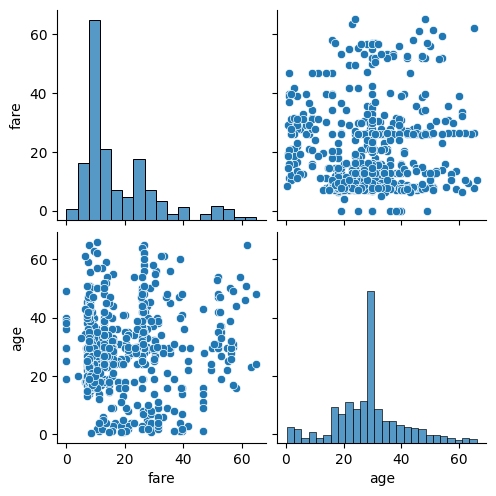

In [ ]:
sns.pairplot(df1)

<Axes: ylabel='age'>

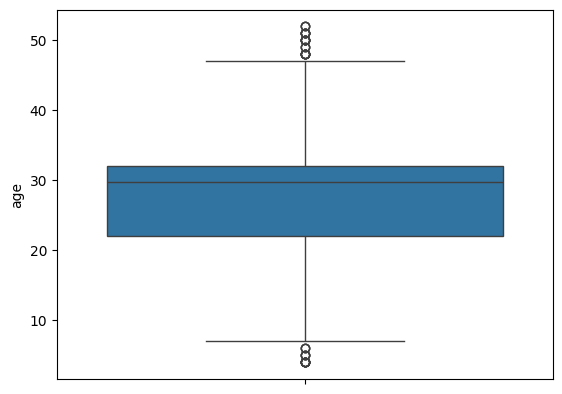

In [ ]:
sns.boxplot(data=df1, y='age')

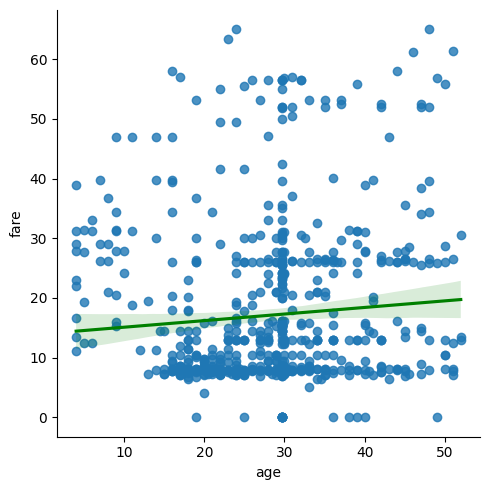

In [51]:
sns.lmplot(x='age', y='fare', data=df1, line_kws={'color': 'green'})

In [53]:
df1=df1[(df1['age']>=7) & (df1['age']<=50)]

In [54]:
df1.describe()

,fare,age
count,683.000000,683.000000
mean,16.940177,28.697302
std,13.417884,8.594276
min,0.000000,7.000000
25%,7.854200,23.000000
50%,10.500000,29.699118
75%,24.150000,32.000000
max,65.000000,50.000000


<Axes: ylabel='fare'>

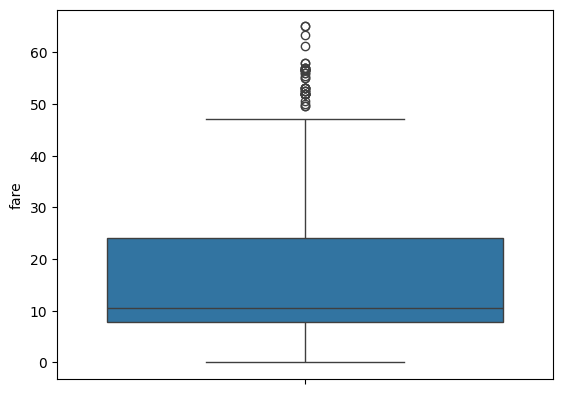

In [55]:
#boxpot fare
sns.boxplot(data=df1, y='fare')

In [56]:
#fare>2 and <48
df1=df1[(df1['fare']>2) & (df1['fare']<48)]


In [57]:
df1.describe()

,fare,age
count,626.000000,626.000000
mean,14.793216,28.338772
std,9.313733,8.508881
min,4.012500,7.000000
25%,7.859400,22.250000
50%,10.500000,29.699118
75%,20.562500,32.000000
max,47.100000,50.000000


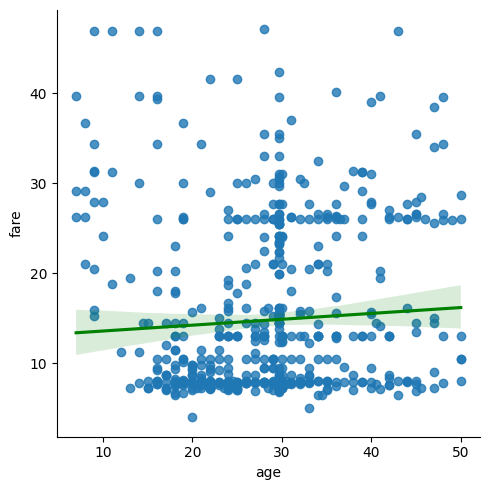

In [58]:
#lamplot
sns.lmplot(x='age', y='fare', data=df1, line_kws={'color': 'green'})

In [64]:
x=df1[['age']]
y=df1[['fare']]


In [ ]:
model=LinearRegression()

model.fit(x, y)
model.predict([[80]])

c:\Users\qasim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[18.15781414]])

In [69]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [71]:
model=LinearRegression()
model.fit(x_train, y_train)
predicted_y= model.predict(x_test)

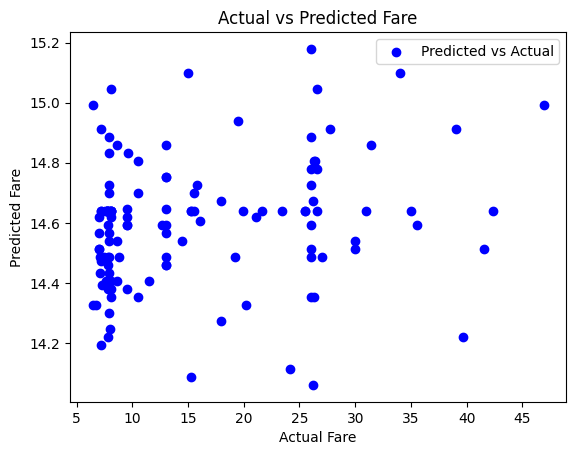

In [77]:

plt.scatter(y_test, predicted_y, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.legend()
plt.show()

In [91]:
#check model score
model.score(x_test, y_test)

-0.07073222046431238

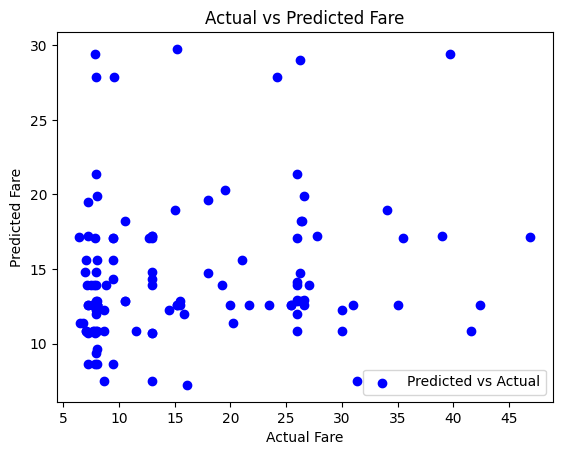

In [ ]:

# which algorithm to use to enhane accuracy above 80%
#use decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train, y_train)
predicted_y= model.predict(x_test)
plt.scatter(y_test, predicted_y, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.legend()
plt.show()




In [81]:
#check model score
model.score(x_test, y_test)

-0.07073222046431238